<a href="https://colab.research.google.com/github/sanjay1618/-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow/blob/main/Advertising_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
Advertising = pd.read_csv("/content/Advertising.csv")
Advertising.drop(Advertising.columns[0], axis = 1, inplace = True)
print(Advertising.head(n = 5))

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


In [16]:
# If you see the above dataset, we need to predict the sales of the company given the different types of advertisements.
# Splitting the dataset into test sets and train sets with the 0.2 ratio
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(Advertising, test_size = 0.2, random_state = 42)
print(train_set)

        TV  Radio  Newspaper  Sales
79   116.0    7.7       23.1   11.0
197  177.0    9.3        6.4   12.8
38    43.1   26.7       35.1   10.1
24    62.3   12.6       18.3    9.7
122  224.0    2.4       15.6   11.6
..     ...    ...        ...    ...
106   25.0   11.0       29.7    7.2
14   204.1   32.9       46.0   19.0
92   217.7   33.5       59.0   19.4
179  165.6   10.0       17.6   12.6
102  280.2   10.1       21.4   14.8

[160 rows x 4 columns]


<Axes: xlabel='TV', ylabel='Sales'>

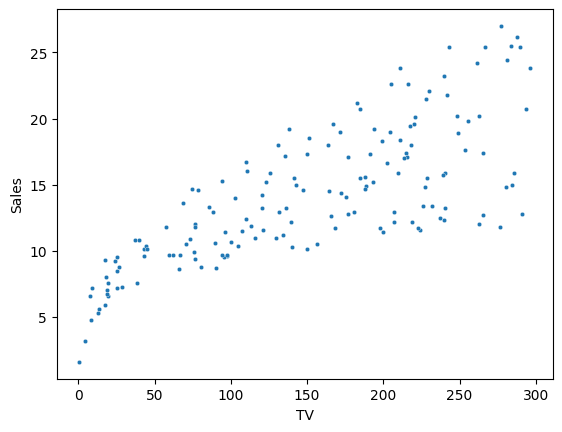

In [21]:
# Scatterplot between TV and the sales ...It looks like there is some positive coorealtion between TV and sales.
sns.scatterplot(data = train_set, x ="TV", y="Sales", s =10)

In [22]:
train_set.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.053872,0.019084,0.768874
Radio,0.053872,1.000000,0.388074,0.592373
Newspaper,0.019084,0.388074,1.000000,0.237874
Sales,0.768874,0.592373,0.237874,1.000000


In [37]:
# Dividing the training dataset into X_train and y_train
X_train, y_train = train_set.iloc[:,[0,1,2]], train_set.iloc[:,[3]]
print(X_train)
# Dividing the testing dataset into X_test and y_test
X_test, y_test = test_set.iloc[:,[0,1,2]], test_set.iloc[:,[3]]

        TV  Radio  Newspaper
79   116.0    7.7       23.1
197  177.0    9.3        6.4
38    43.1   26.7       35.1
24    62.3   12.6       18.3
122  224.0    2.4       15.6
..     ...    ...        ...
106   25.0   11.0       29.7
14   204.1   32.9       46.0
92   217.7   33.5       59.0
179  165.6   10.0       17.6
102  280.2   10.1       21.4

[160 rows x 3 columns]


In [43]:
#From the above corelation matrix, we can see that there is a strong corelation between TV and sales and also, Radio and sales.
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train.iloc[:,[0,1]], y_train)
predicted = linear_regression.predict(X_test.iloc[:,[0,1]])
print(pd.DataFrame(predicted, columns = y_test.columns, index = y_test.index))

         Sales
95   16.357473
15   20.862994
30   21.525058
158  10.587198
128  22.224596
115  13.060705
69   21.095644
170   7.476411
174  13.624098
45   15.150194
66    9.127611
182   6.628789
165  14.165311
78    8.970739
186   9.668255
177  12.128217
56    8.712522
152  16.309115
82   10.266842
68   18.890104
124  19.451953
16   13.039256
148  12.411821
93   21.209941
65    7.887714
60    5.802554
84   20.776440
67   12.023583
125   9.178437
132   8.590123
9    12.460705
18   10.032133
55   21.343677
75   12.116323
150  18.233765
104  20.222424
135  14.149994
137  20.780675
164  11.073221
76    4.563351


In [44]:
# Using the metrics from the sklear.metrics we will find out the mean squared error, mean error and r2 score for the predicted model.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
squarred_error = mean_squared_error(y_test, predicted)
print(squarred_error)

3.137948009068354
